In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

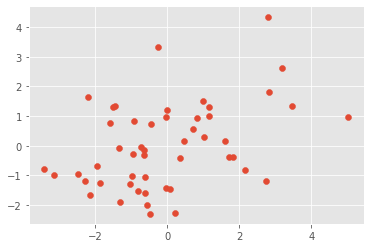

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:,0], data[:,1])
plt.show()

[3.61803399 1.38196601] [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


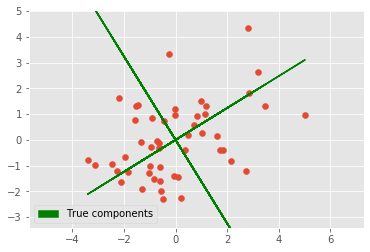

In [5]:
v, W_true = np.linalg.eig(C)
print(v, W_true)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

In [6]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

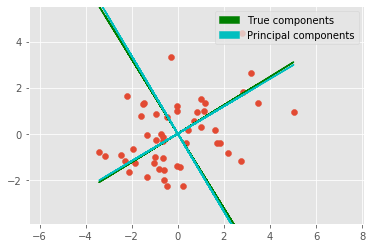

In [7]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

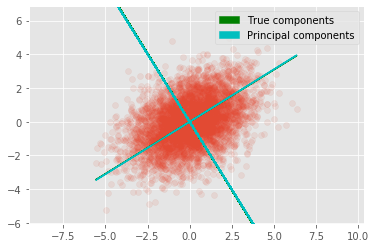

In [8]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:,0], data_large[:,1], alpha=0.1)
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_large[:,0], (W_true[0,0]/W_true[0,1])*data_large[:,0], color="g")
plt.plot(data_large[:,0], (W_true[1,0]/W_true[1,1])*data_large[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

In [10]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task1.csv')


In [15]:
print(len(data.columns))
#81

80


In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
d_scores = []
for d in range(1, 81):
    model = PCA(n_components=d)
    scores = cv_score(model, data)
    d_scores.append(np.mean(scores))

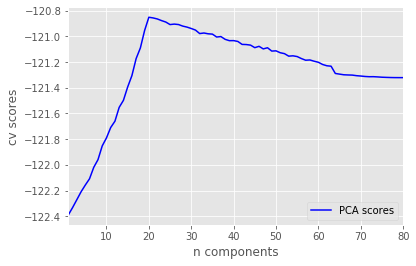

In [25]:
d_scores_np = np.array(d_scores)
plot_scores(np.array(d_scores))

In [59]:
write_answer_1(np.argmax(d_scores_np)+1)

In [37]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task2.csv')

In [31]:
print((data.columns))
#101

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96',
       '97', '98', '99'],
      dtype='object')


In [86]:
d_variances = []
for d in range(2,101):
    #print(data)
    model = PCA(n_components=d)
    model.fit(data)
    New_data = model.transform(data)
    Disp = np.std(New_data, axis = 0)
    sort_Disp = -np.sort(-Disp)
    Ras = []
    for i in range(1,len(sort_Disp)):
        Ras.append(sort_Disp[i-1] - sort_Disp[i])
    
   # plt.plot(np.arange(1,len(sort_Disp)), Ras)
   # plt.show()
    d_variances.append(np.argmax(np.array(Ras))+1)


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30]


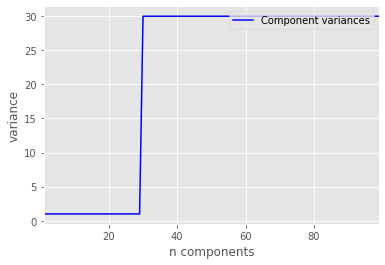

In [87]:
d_variances_np = np.array(d_variances)
print(d_variances_np)
plot_variances(np.array(d_variances))


In [99]:
from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))


iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

In [100]:
print(target_names)

['setosa' 'versicolor' 'virginica']


In [117]:
from sklearn.preprocessing import StandardScaler

model = PCA(n_components=2)
model.fit(data)
new_data = model.transform(data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaler = StandardScaler()
scaled_new_data = scaler.fit_transform(new_data)



0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
[0.8974017619582987, -0.39874847245570044, 0.9978739422413104, 0.9665475167033074, 0.39060441288849285, 0.825228709231999, -0.048380599689891474, -0.04878160292939494]


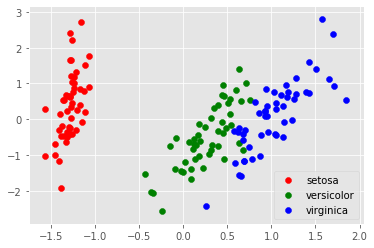

In [120]:
Pir = []
for i in range(0,2):
    for j in range(len(data[0])):
        print(i, j)
        pir = np.corrcoef(scaled_new_data[:,i], scaled_data[:, j])
        Pir.append(pir[0][1])
print(Pir)

plot_iris(scaled_new_data, target, target_names)


In [122]:
write_answer_3([1,3,4], [2])

In [124]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

def write_answer_4(list_pc):
    with open("pca_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc]))

data = fetch_olivetti_faces(shuffle=True, random_state=0).data
image_shape = (64, 64)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Mi\scikit_learn_data


In [126]:
print(data)

[[0.6694215  0.6363636  0.6487603  ... 0.08677686 0.08264463 0.07438017]
 [0.76859504 0.75619835 0.74380165 ... 0.48347107 0.6280992  0.6528926 ]
 [0.37190083 0.34710744 0.3677686  ... 0.7066116  0.6818182  0.5495868 ]
 ...
 [0.55785125 0.60330576 0.6570248  ... 0.17768595 0.20661157 0.19421488]
 [0.5206612  0.5206612  0.53305787 ... 0.46694216 0.43801653 0.43801653]
 [0.3966942  0.3677686  0.3429752  ... 0.37190083 0.26859504 0.29752067]]


In [131]:
#from sklearn.decomposition import RandomizedPCA 

model = PCA(n_components=10)
model.fit(data)
new_data = model.transform(data)

In [134]:
Impact = np.zeros((len(new_data), 10))

In [136]:
for i in range(len(new_data)):
    for j in range(len(new_data[0])):
        Impact[i][j] = new_data[i][j] ** 2 /np.sum(new_data[i] ** 2)

In [142]:
list_pc = []
for j in range(len(new_data[0])):
    list_pc.append(np.argmax(Impact[:,j]))

In [143]:
print(list_pc)

[197, 18, 66, 319, 363, 131, 142, 382, 353, 140]


In [144]:
write_answer_4(list_pc)

# Примечание

C:\Users\Mi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


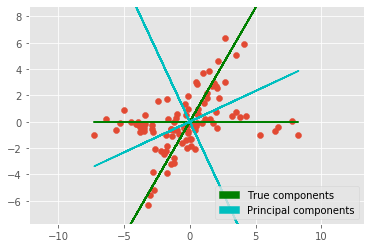

In [145]:
C1 = np.array([[10,0],[0,0.5]])
phi = np.pi/3
C2 = np.dot(C1, np.array([[np.cos(phi), np.sin(phi)],
                          [-np.sin(phi),np.cos(phi)]]))

data = np.vstack([np.random.multivariate_normal(mu, C1, size=50),
                  np.random.multivariate_normal(mu, C2, size=50)])
plt.scatter(data[:,0], data[:,1])
# построим истинные интересующие нас компоненты
plt.plot(data[:,0], np.zeros(data[:,0].size), color="g")
plt.plot(data[:,0], 3**0.5*data[:,0], color="g")
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

В чём проблема, почему pca здесь работает плохо? Ответ прост: интересующие нас компоненты в данных коррелированны между собой (или неортогональны, в зависимости от того, какой терминологией пользоваться). Для поиска подобных преобразований требуются более сложные методы, которые уже выходят за рамки метода главных компонент.

Для интересующихся: то, что можно применить непосредственно к выходу метода главных компонент, для получения подобных неортогональных преобразований, называется методами ротации. Почитать о них можно в связи с другим методом уменьшения размерности, который называется Factor Analysis (FA), но ничего не мешает их применять и к главным компонентам.

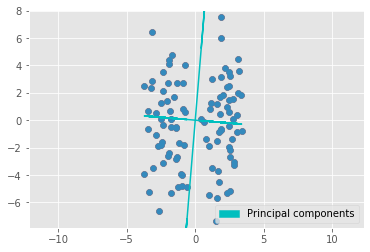

In [146]:
C = np.array([[0.5,0],[0,10]])
mu1 = np.array([-2,0])
mu2 = np.array([2,0])

data = np.vstack([np.random.multivariate_normal(mu1, C, size=50),
                  np.random.multivariate_normal(mu2, C, size=50)])
plt.scatter(data[:,0], data[:,1])
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model)
plt.draw()

Очевидно, что в данном случае метод главных компонент будет считать вертикальную компоненту более значимой для описания набора данных, чем горизонтальную.

Но, например, в случае, когда данные из левого и правого кластера относятся к разным классам, для их линейной разделимости вертикальная компонента является шумовой. Несмотря на это, её метод главных компонент никогда шумовой не признает, и есть вероятность, что отбор признаков с его помощью выкинет из ваших данных значимые для решаемой вами задачи компоненты просто потому, что вдоль них значения имеют низкую дисперсию.

Справляться с такими ситуациями могут некоторые другие методы уменьшения размерности данных, например, метод независимых компонент (Independent Component Analysis, ICA).